# Machine à vecteurs de supports - Support vector machine

Dans cet exercice, on cherche à implémenter un classificateur à vaster marge souple pour résoudre un problème de classification à trois classes. Les SVMs sont pensés pour résouder des probèmes de classifications à deux classes. Dans un premier temps, on implémente donc un algorithme pour résouder un problème avec deux classes. On prend ensuite une approche 'un contre tous' pour résoudre le problème avec trois classes.

In this exercise, we aim to implement a soft-margin classifier to solve a three-class classification problem. SVMs are designed to solve two-class classification problems. Therefore, we will first implement an algorithm to solve a two-class problem. Then, we will take a "one-vs-all" approach to address the three-class problem.

*Consigne:* Compléter les fonctions ci-dessous. Attention à ne pas changer le seed où la manière dont les données sont chargées.

*Instruction:* Complete the functions below. Be careful not to change the seed or the way the data is loaded.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed = 42

## Problème de classification à deux classes


In [ ]:
# Chargement des données
iris = load_iris()
X = iris.data[iris.target != 0, :]
y = iris.target[iris.target != 0]

# On redéfinit les étiquettes comme étant -1 et 1
y = np.where(y == 1, -1, 1)
# On sépare en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

C = 1.0  # Paramètre pour la régularisation
m, n = X_train.shape


X_train_augmented = np.hstack([X_train, np.ones((m, 1))])  # Ajout d'une colonne pour le biais
w = np.zeros(n + 1)

In [ ]:
def loss_function(X, y, w, C):
  """
  X: données d'entrée - input data (np.array)
  y: étiquettes - labels (np.array)
  w: paramètres du classificateur - classifier parameters (np.array)
  C: hyperparamètre contant

  Cette fonction encode l'objectif du problème d'optimisation du classificateur à vaste marge souple.
  La fonction retourne un nombre réel (float).

  This function encodes the objective of the optimization problem for the soft-margin classifier.
  The function returns a real number (float).
  """
  hinge_loss = np.maximum(0, 1 - y*np.dot(X, w))
  regularization = (1/(2*C)) * np.linalg.norm(w)**2

  return np.sum(hinge_loss) + regularization


def gradient(X, y, w, C):
  """
  X: données d'entrée - input data (np.array)
  y: étiquettes - labels (np.array)
  w: paramètres du classificateur - classifier parameters (np.array)
  C: hyperparamètre contant

  Cette fonction calcule le gradient de la fonction de perte par rapport aux paramètres w.
  Elle retourne un vecteur (np.array)

  This function computes the gradient of the loss with respect to the parameters.
  It returns a vector (np.array)
  """
  return np.where(1-y*(X @ w) > 0, -y, np.zeros(len(y))) @ X + C*w


def predict(X, w):
  """
  X: données d'entrée - input data (np.array)
  w: paramètres du classificateur - classifier parameters (np.array)

  Cette fonction retourne les étiquettes correspondants au données X.

  This function returns the labels corresponding to the data X.
  """
  return np.sign(np.dot(X, w))


In [ ]:
# Training
# Ne pas modifier cette partie du code
# Do not change this part of the code

epochs = 10000
learning_rate = 0.001
loss = []

for epoch in range(epochs):
    grad = gradient(X_train_augmented, y_train, w, C)
    w -= learning_rate * grad
    if epoch % 750 == 0:
      print(f"Epoch {epoch}, Loss: {loss_function(X_train_augmented, y_train, w, C):.4f}")
      loss.append(loss_function(X_train_augmented, y_train, w, C))

# Test Accuracy
X_test_augmented = np.hstack([X_test, np.ones((X_test.shape[0], 1))])  # Add bias term
y_pred = predict(X_test_augmented, w)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {100*accuracy:.1f} %")

Epoch 0, Loss: 70.5681
Epoch 750, Loss: 25.5171
Epoch 1500, Loss: 20.4537
Epoch 2250, Loss: 15.5717
Epoch 3000, Loss: 15.9222
Epoch 3750, Loss: 16.6868
Epoch 4500, Loss: 16.3191
Epoch 5250, Loss: 20.9531
Epoch 6000, Loss: 15.9826
Epoch 6750, Loss: 16.0511
Epoch 7500, Loss: 17.6506
Epoch 8250, Loss: 24.5122
Epoch 9000, Loss: 16.1805
Epoch 9750, Loss: 16.2766
Test Accuracy: 85.0 %


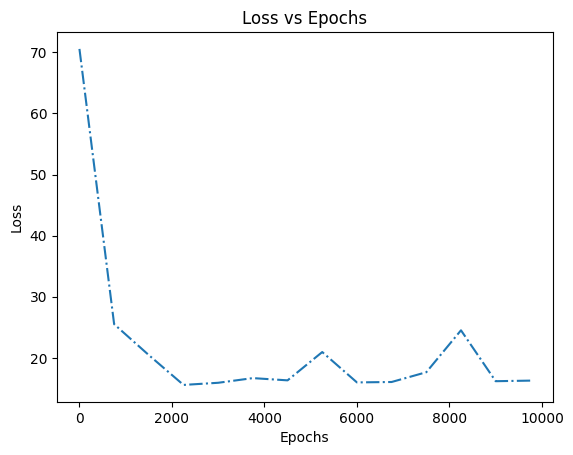

In [ ]:
x_epoch = np.arange(0, epochs, 750)
plt.plot(x_epoch,loss,linestyle='-.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Problème de classification à trois classes

In [ ]:
# Load the iris dataset
iris = load_iris()
X_full = iris.data
y_full = iris.target

X_train_OVA, X_test_OVA, y_train_OVA, y_test_OVA = train_test_split(X_full, y_full, test_size=0.2, random_state=seed)
# X_val_OVA,X_train_OVA,y_val_OVA,y_train_OVA = train_test_split(X_train_OVA,y_train_OVA,test_size=0.85,random_state=seed)

C = 1.0
epochs = 1000
learning_rate = 0.001

def augment_features(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

X_train_augmented_OVA = augment_features(X_train_OVA)
X_test_augmented_OVA = augment_features(X_test_OVA)
# X_val_augmented_OVA = augment_features(X_val_OVA)



**Consignes**:
1.   En s'insipirant du code ci-dessus, implémentez un classificateur pour résoudre le problème à trois classes en utilisant des SVM et l'approche "un contre tous". Vous devez entrainer votre modèle sur le jeu d'entraînement chargé ci-dessus et le tester sur les données de test.
2. Calculez le score (pourcentage de bonne prédiction) pour votre modèle.
3. En utilisant matplotlib.pyplot, créez une fonction pour visualiser les résultats du modèle et les frontières de décision. (Pour cette question, on peut considérer uniquement les deux premières caractéristiques de X pour rendre le problème bi-dimensionel).

**Instructions**:
1. Using the code above as inspiration, implement a classifier to solve the three-class problem using SVMs and the "one-vs-all" approach. You need to train your model on the training dataset provided and test it on the test data.

2. Calculate the score (percentage of correct predictions) for your model.

3. Using matplotlib.pyplot, create a function to visualize the model's results and decision boundaries. (For this question, you can consider only the first two features of X to make the problem two-dimensional).

In [ ]:
class OneForAll_SVC:
  def __init__(self, C=1.0, epochs=10000, learning_rate=0.001):
    """
    C: hyperparamètre contant
    epochs: nombre d'itérations
    learning_rate: pas d'apprentissage
    """
    self.C = C
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.classifiers = []

  def fit(self, X, y):
    """
    X: données d'entrée - input data (np.array)
    y: étiquettes - labels (np.array)

    Cette fonction entraine notre modèle par une approche un-contre-tous en utilisant le modèle de SVM déjà construit plus haut
    """
    unique_classes = np.unique(y)
    for cls in unique_classes:
        y_binary = np.where(y == cls, 1, -1)    # sets the current class to 1, and the others to -1
        w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            grad = gradient(X, y_binary, w, self.C)
            w -= self.learning_rate * grad
        self.classifiers.append(w)
    return np.array(self.classifiers)

  def predict(self, X):
    """
    X : données de test (np.array)

    Cette fonction retourne les prédictions sur les données de test
    """
    scores = np.array([np.dot(X, w) for w in self.classifiers]).T
    return np.argmax(scores, axis=1)

  def score(self, X, y):
    """
    X : données de test (np.array)
    y : étiquettes de test (np.array)

    Cette fonction calcule le score de notre modèle
    """
    y_pred = self.predict(X)
    return np.mean(y_pred == y)

  def plot_decision_boundary(self, X, y):
    """
    X : Données à visualiser (np.array)
    y : Etiquettes (np.array)

    Cette fonction affiche les frontières de décision du modèle
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                        np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_augmented = augment_features(grid)

    Z = self.predict(grid_augmented)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    cm=plt.cm.inferno
    plt.contourf(xx, yy, Z,alpha=0.5,cmap = cm)
    plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k' ,cmap = cm)
    plt.colorbar(cmap=plt.cm,ticks=[0,1,2],location='left', label='Classes')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[2])
    plt.title('Decision Boundaries for One-vs-All classifier')



In [ ]:
# On entraîne notre modèle sur les données entières
clf_full = OneForAll_SVC()
clf_full.fit(X_train_augmented_OVA, y_train_OVA)

# Testing our model
preds = clf_full.predict(X_test_augmented_OVA)
print(f"Prédiction pour l'ensemble de test    : {preds:}")
print(f"Classes réelle pour l'ensemble de test: {y_test_OVA:}")
accuracy = clf_full.score(X_test_augmented_OVA, y_test_OVA)
print(f"Test Accuracy: {100*accuracy:.1f} %")

#clf_full.plot_decision_boundary(X_full,y_full)


Prédiction pour l'ensemble de test    : [1 0 2 2 1 0 0 2 1 1 2 0 0 0 0 2 2 1 2 2 0 2 0 2 2 2 2 2 0 0]
Classes réelle pour l'ensemble de test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Test Accuracy: 86.7 %


In [ ]:
# Création d'un deuxième dataset pour la visualisation (seulement 2 features)
X_visual = X_full[:,[0,2]]
X_train_visual, X_test_visual, y_train_visual, y_test_visual= train_test_split(X_visual, y_full, test_size=0.2, random_state=seed)

X_train_augmented_visual = augment_features(X_train_visual)
X_test_augmented_visual = augment_features(X_test_visual)

Prédiction pour l'ensemble de test     : [2 0 2 2 2 0 1 2 2 1 2 0 0 0 0 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0]
Classes réelles pour l'ensemble de test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Test Accuracy: 76.7 %


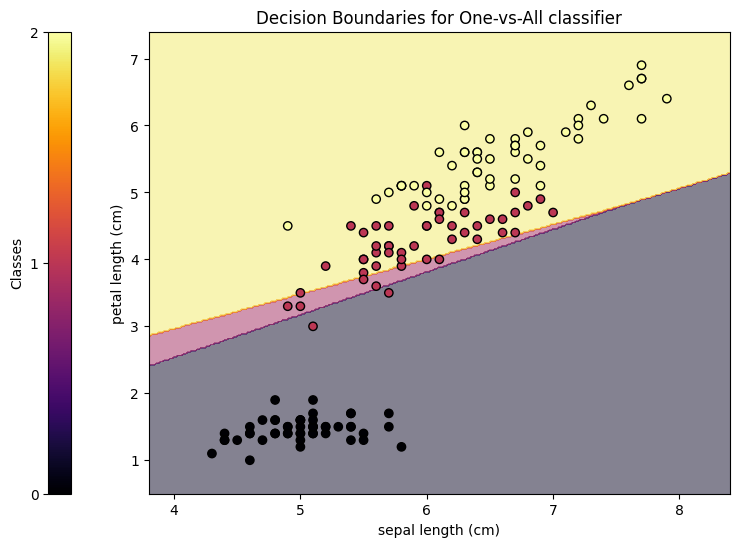

In [ ]:
# On entraîne notre modèle sur les deux premières features seulement
clf_2D = OneForAll_SVC()
weights_2D = clf_2D.fit(X_train_augmented_visual,y_train_visual)

preds_2D = clf_2D.predict(X_test_augmented_visual)
print(f"Prédiction pour l'ensemble de test     : {preds_2D:}")
print(f"Classes réelles pour l'ensemble de test: {y_test_visual:}")
accuracy_2D = clf_2D.score(X_test_augmented_visual,y_test_visual)
print(f"Test Accuracy: {100*accuracy_2D:.1f} %")

# On visualise les frontières de décisions sur notre modèle entraîné sur les deux premières caractéristiques
clf_2D.plot_decision_boundary(X_visual,y_full)